### Import necessary packages

In [281]:
from datetime import datetime
#import it in console with: pip install pandas-datareader
import pandas_datareader.data as wb
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
import matplotlib as mpl

### Load the data
Input:

| Argument   | Description                             |
|------------|-----------------------------------------|
| ticker     | list of choosen tickers                 |
| start_date | starte date of search in YYY-M-D format |
| end_date   | end of date search in YYYY-M-D format   |

Output: Pandas DataFrame with finance data from Yahoo

In [282]:
def get_data_from_api(ticker, start_date, end_date):
    dataframe = wb.DataReader(ticker, 'yahoo', start_date, end_date)
    return dataframe
start = datetime(1990,1,1)
end = datetime(2021,4,4)
df = get_data_from_api("MSFT", start, end)
df.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1990-01-02,0.616319,0.598090,0.605903,0.616319,53035200.0,0.391455
1990-01-03,0.626736,0.614583,0.621528,0.619792,113774400.0,0.393661
1990-01-04,0.638889,0.616319,0.619792,0.638021,125740800.0,0.405239


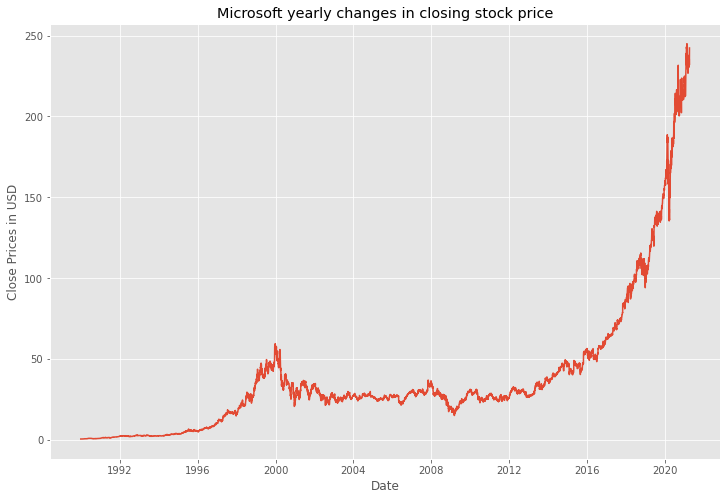

In [283]:
#plot close price
plt.figure(figsize=(12,8))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices in USD')
plt.plot(df['Close'])
plt.title('Microsoft yearly changes in closing stock price')
plt.show()

### Visualize moving averages
Calculate moving averages based on closing price with a window of 5, 20, 100, and 200 days

In [284]:
close_px = df['Close']
MA5 = close_px.rolling(window = 5).mean()
MA20 = close_px.rolling(window = 20).mean()
MA100 = close_px.rolling(window = 100).mean()
MA200 = close_px.rolling(window = 200).mean()

Close price VS Moving Average 5/20/100/200 days of MSFT

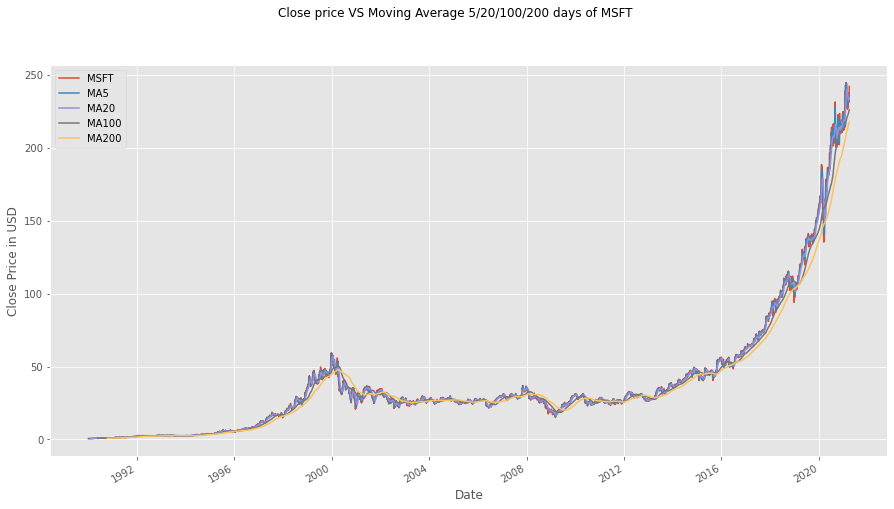

In [285]:
mpl.rc('figure', figsize=(15, 8))
style.use('ggplot')
close_px.plot(label = 'MSFT')
MA5.plot(label = 'MA5')
MA20.plot(label = 'MA20')
MA100.plot(label = 'MA100')
MA200.plot(label = 'MA200')
plt.ylabel('Close Price in USD')
plt.suptitle('Close price VS Moving Average 5/20/100/200 days of MSFT')
plt.legend()

Close price VS Moving Average 5 days of MSFT

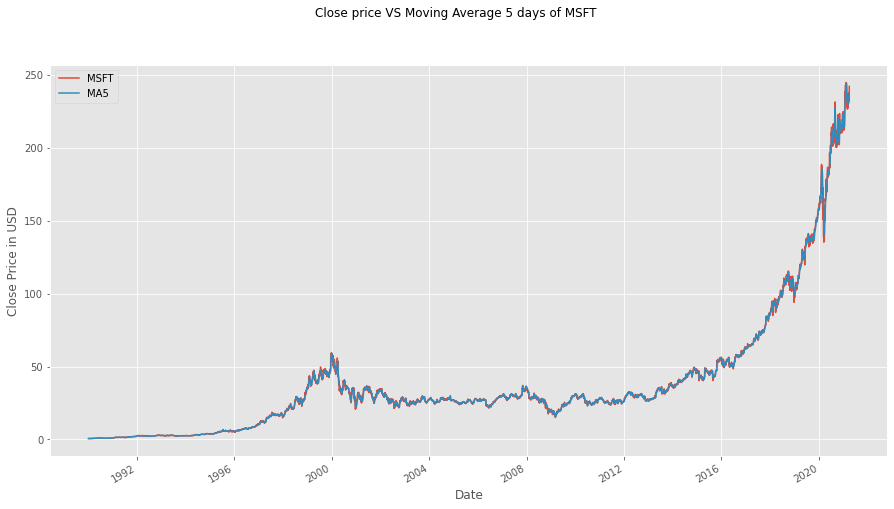

In [286]:
mpl.rc('figure', figsize=(15, 8))
mpl.__version__
style.use('ggplot')
close_px.plot(label = 'MSFT')
MA5.plot(label = 'MA5')
plt.ylabel('Close Price in USD')
plt.suptitle('Close price VS Moving Average 5 days of MSFT')
plt.legend()

Close price VS Moving Average 20 days of MSFT

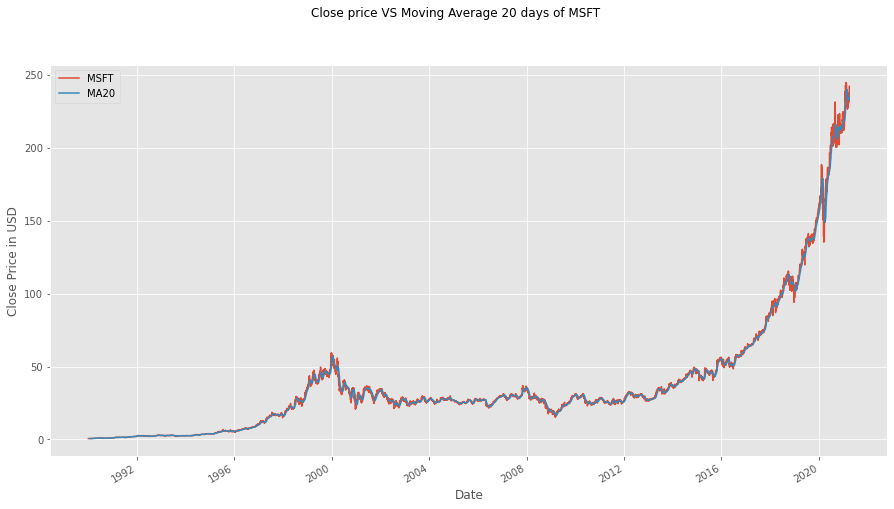

In [287]:
mpl.rc('figure', figsize=(15, 8))
mpl.__version__
style.use('ggplot')
close_px.plot(label = 'MSFT')
MA20.plot(label = 'MA20')
plt.ylabel('Close Price in USD')
plt.suptitle('Close price VS Moving Average 20 days of MSFT')
plt.legend()

Close price VS Moving Average 100 days of MSFT

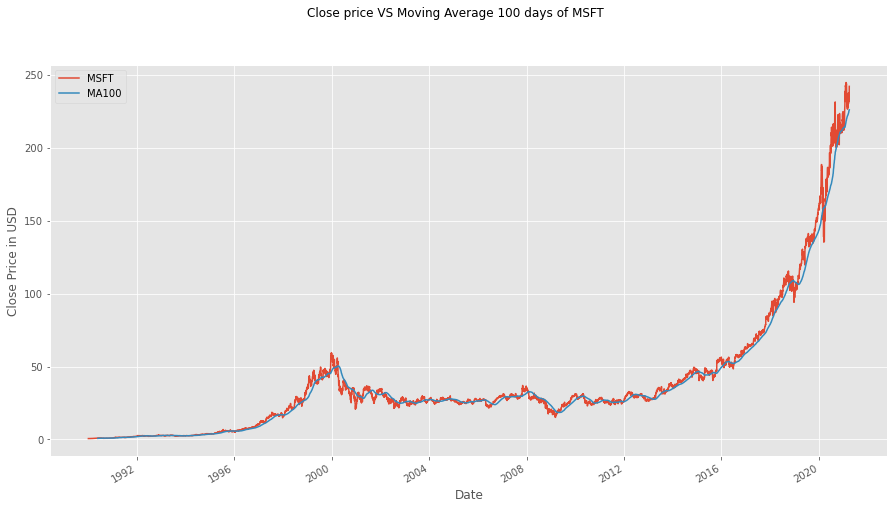

In [288]:
mpl.rc('figure', figsize=(15, 8))
mpl.__version__
style.use('ggplot')
close_px.plot(label = 'MSFT')
MA100.plot(label = 'MA100')
plt.ylabel('Close Price in USD')
plt.suptitle('Close price VS Moving Average 100 days of MSFT')
plt.legend()

Close price VS Moving Average 200 days of MSFT

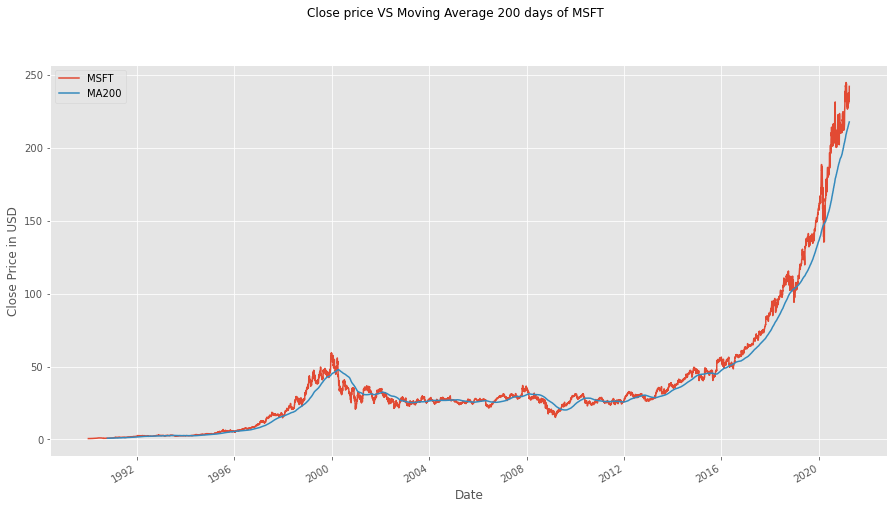

In [289]:
mpl.rc('figure', figsize=(15, 8))
mpl.__version__
style.use('ggplot')
close_px.plot(label = 'MSFT')
MA200.plot(label = 'MA200')
plt.ylabel('Close Price in USD')
plt.suptitle('Close price VS Moving Average 200 days of MSFT')
plt.legend()

### Preprocess data for showing MA in 2020

In [290]:
#Seperate dataframe so we keep original for further exploration
ma_df = df
#Set index as datetime
ma_df.index = pd.to_datetime(ma_df.index)
#Set label by shifting Closing price by -1
ma_df['Label'] = ma_df['Close'].shift(-1)
#Log_r
log_r = np.log(ma_df['Close'] / ma_df['Close'].shift(1))

#Drop non-used columns
ma_df = ma_df.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)

#Drop NaN values
ma_df = ma_df.dropna()

#Standarizing
ma_df = (ma_df - ma_df.mean())/ma_df.std()

## rolling mean
close_px = ma_df['Close']
ma_df['MA5'] = close_px.rolling(5,min_periods=1).mean()
ma_df['MA20'] = close_px.rolling(20,min_periods=1).mean()
ma_df['MA100'] = close_px.rolling(100,min_periods=1).mean()
ma_df['MA200'] = close_px.rolling(200,min_periods=1).mean()
print(ma_df.tail())

               Close     Label       MA5      MA20     MA100     MA200
Date                                                                  
2021-03-25  4.458351  4.546712  4.504430  4.482207  4.288296  4.100540
2021-03-26  4.553543  4.518239  4.532619  4.486920  4.296116  4.105097
2021-03-29  4.525031  4.440397  4.529170  4.484966  4.303683  4.110727
2021-03-30  4.447085  4.530409  4.502820  4.482643  4.309528  4.115798
2021-03-31  4.537218  4.681501  4.504246  4.492082  4.313984  4.121182


MA5 and close price in 2020

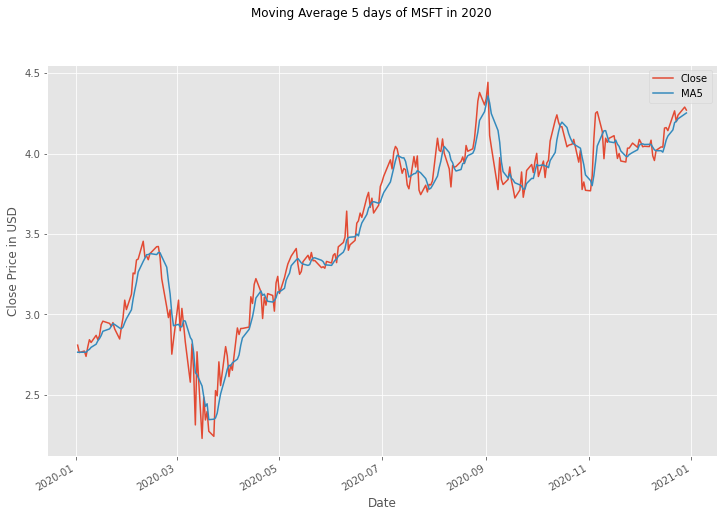

In [291]:
ma_df['Close'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8), label = 'Close')
ma_df['MA5'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8),label = 'MA5')
plt.ylabel('Close Price in USD')
plt.suptitle('Moving Average 5 days of MSFT in 2020')
plt.legend()


MA20 and close price in 2020

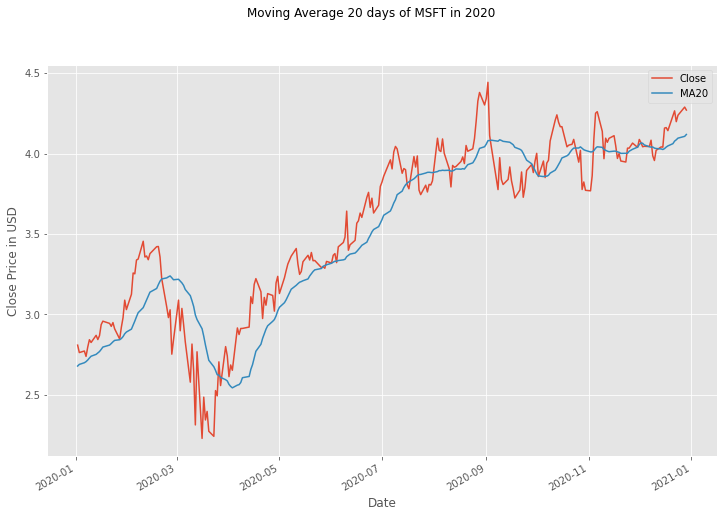

In [292]:
ma_df['Close'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8), label = 'Close')
ma_df['MA20'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8),label = 'MA20')
plt.ylabel('Close Price in USD')
plt.suptitle('Moving Average 20 days of MSFT in 2020')
plt.legend()

MA100 and close price in 2020

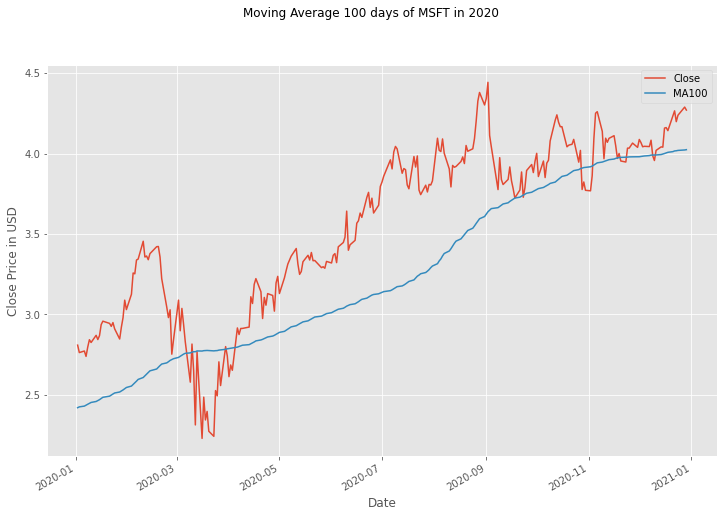

In [293]:
ma_df['Close'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8), label = 'Close')
ma_df['MA100'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8),label = 'MA100')
plt.ylabel('Close Price in USD')
plt.suptitle('Moving Average 100 days of MSFT in 2020')
plt.legend()


MA200 and close price in 2020

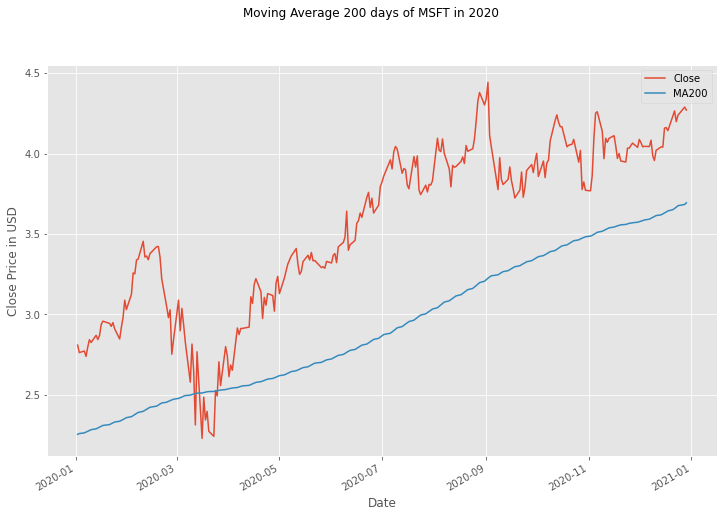

In [294]:
ma_df['Close'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8), label = 'Close')
ma_df['MA200'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8),label = 'MA200')
plt.ylabel('Close Price in USD')
plt.suptitle('Moving Average 200 days of MSFT in 2020')
plt.legend()


Plot these four MA values with close price in the same chart

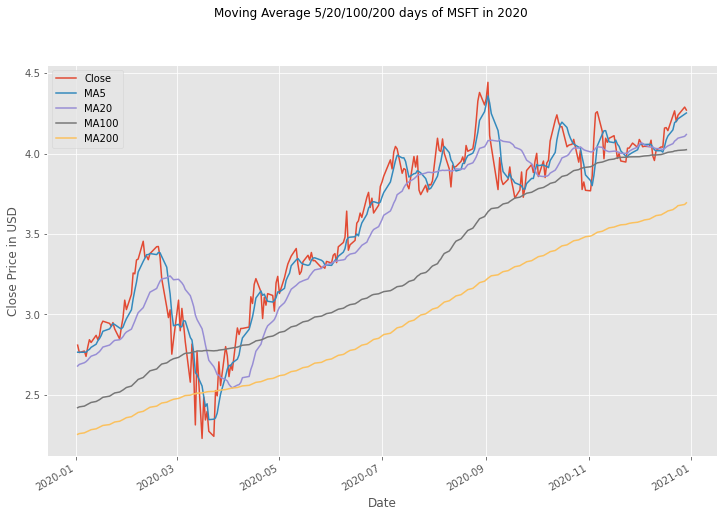

In [295]:
ma_df['Close'].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8), label = 'Close')
ma_df["MA5"].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8),label = 'MA5')
ma_df["MA20"].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8),label = 'MA20')
ma_df["MA100"].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8),label = 'MA100')
ma_df["MA200"].loc['2020-01-01':'2020-12-29'].plot(figsize=(12,8),label = 'MA200')

plt.ylabel('Close Price in USD')
plt.suptitle('Moving Average 5/20/100/200 days of MSFT in 2020')
plt.legend()

## Pre-process data function
Since the various models require somewhat different pre-processing a function that handles the various needs is created.

| Argument         | Description                                                  |
|------------------|--------------------------------------------------------------|
| raw_df           | Dataframe input                                              |
| Standarize       | Boolean if the data should be standarized or not             |
| Drop_standard    | Boolean if standard values should be removed or not          |
| calculation      | Array containing which calculations that should be performed |
| calculations []  | MA5, MA20, MIN, MAX, mom, vola                               |

In [296]:
#Preprocess data
def process_data(raw_df, standarize, drop_standard, calculations):
        #Set index as datetime
        raw_df.index = pd.to_datetime(raw_df.index)
        #Set label by shifting Closing price by -1
        raw_df['Label'] = raw_df['Close'].shift(-1)
         #Creating more features
        #Log_r
        log_r = np.log(raw_df['Close'] / raw_df['Close'].shift(1))
        max_roll_window = 0
        #Check which calculations should be applied
        if 'MA5' in calculations:
            raw_df['MA5'] = raw_df['Close'].rolling(5).mean()
            max_roll_window = 5
        if 'MA20' in calculations:
            raw_df['MA20'] = raw_df['Close'].rolling(20).mean()
            max_roll_window = 20
        if 'MIN' in calculations:
            raw_df['MIN'] = raw_df['Close'].rolling(20).min()
        if 'MAX' in calculations:
            raw_df['MAX'] = raw_df['Close'].rolling(20).max()
        if 'mom' in calculations:
            raw_df['mom'] = log_r.rolling(20).mean()
            print(max_roll_window)
        if 'vola' in calculations:
            raw_df['vola'] = log_r.rolling(20).std()

        #Drop non-used columns
        if drop_standard:
            raw_df = raw_df.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)
        #Drop NaN values
        raw_df = raw_df.dropna()
        #Standarizing
        if standarize:
            raw_df = (raw_df - raw_df.mean())/raw_df.std()
        return raw_df

### Pre-process data for models

In [297]:
proc_df = process_data(df, False, True, ['MA5', 'MA20', 'MIN', 'MAX'])
proc_df.tail(10)

,Close,Label,MA5,MA20,MIN,MAX
Date,,,,,,
2021-03-18,230.720001,230.350006,235.206000,233.406001,226.729996,240.970001
2021-03-19,230.350006,235.990005,234.126001,232.875001,226.729996,237.710007
2021-03-22,235.990005,237.580002,234.362003,232.949001,226.729996,237.710007
2021-03-23,237.580002,235.460007,234.336002,233.164501,226.729996,237.710007
2021-03-24,235.460007,232.339996,234.020004,233.210001,226.729996,237.710007
2021-03-25,232.339996,236.479996,234.344003,233.377501,226.729996,237.710007
2021-03-26,236.479996,235.240005,235.570001,233.582500,226.729996,237.710007
2021-03-29,235.240005,231.850006,235.420001,233.497501,226.729996,237.710007
2021-03-30,231.850006,235.770004,234.274002,233.396501,226.729996,237.710007


#### Split data into training and test with a 80-20 split
Ignore the temporary fuzz here.

In [298]:
#Split data
import math
# Array splicing and splitting of data

In [299]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(proc_df[['Close', 'MA5', 'MA20', 'MIN', 'MAX']], proc_df['Label'], shuffle=False, test_size=0.2)


## Linear Regression

In [300]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)
model.score(X_test, y_test)
linear_predictions = model.predict(X_test)
print("Actual: ", y_test[:10])
print("Forecasted: ", linear_predictions[:10])
print("Score: ", model.score(X_train, y_train))
print("Score: ", model.score(X_test, y_test))

Actual:  Date
2015-01-05    45.650002
2015-01-06    46.230000
2015-01-07    47.590000
2015-01-08    47.189999
2015-01-09    46.599998
2015-01-12    46.360001
2015-01-13    45.959999
2015-01-14    45.480000
2015-01-15    46.240002
2015-01-16    46.389999
Name: Label, dtype: float64
Forecasted:  [46.32688872 45.6630659  46.21416006 47.52889225 47.14918237 46.5875666
 46.36579586 45.98122113 45.50584542 46.22380659]
Score:  0.9983743196723732
Score:  0.9983505539337317


<Figure size 1200x640 with 0 Axes>

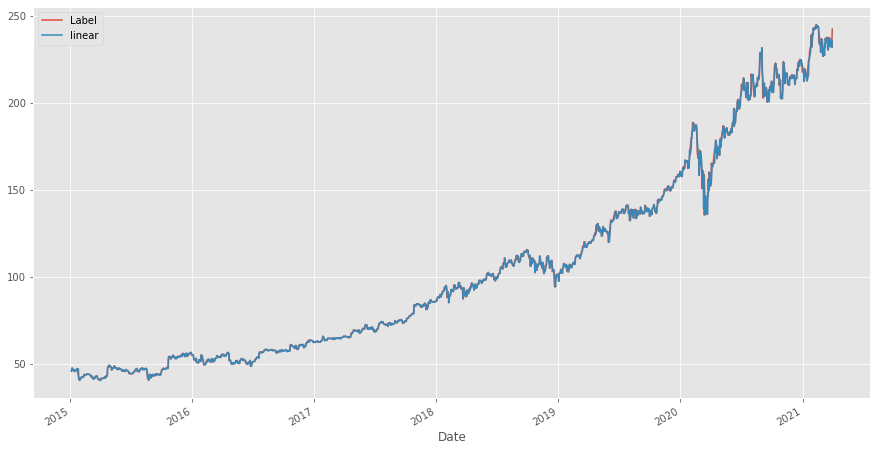

In [301]:
##Visualize the predictions
#Visualize to understand the model behaviour
plt.figure(figsize = (15,8), dpi = 80)
df_pred = pd.DataFrame(data=y_test)
df_pred['linear'] = linear_predictions
df_pred.plot()
plt.show()

## MLP Regression

In [302]:
from sklearn.neural_network import MLPRegressor
#MLP
rnd_state = 1
max_it = 500
regr = MLPRegressor(random_state = rnd_state, max_iter = max_it).fit(X_train, y_train)
print(regr.score(X_train, y_train))
MLPpredictions = regr.predict(X_test)
print(regr.score(X_test, y_test))


0.9983043784029862
0.9982650375289323


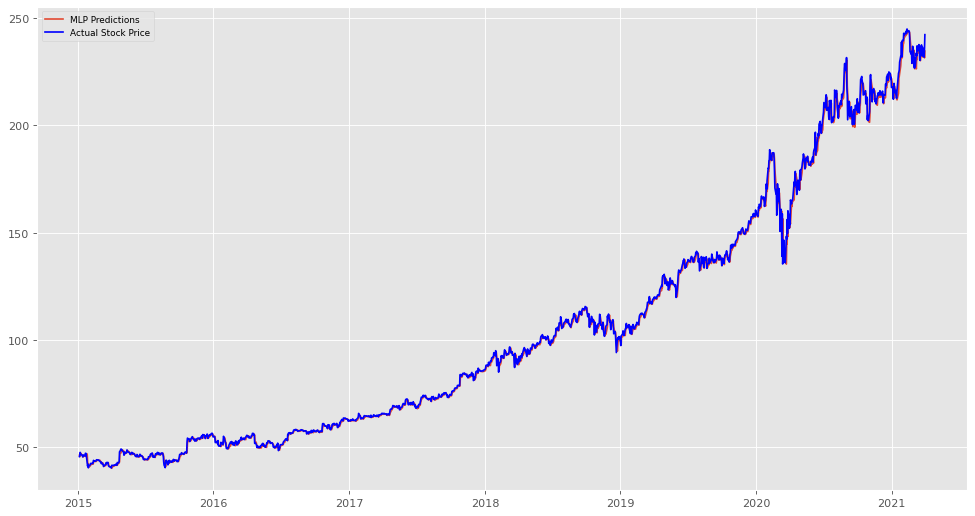

In [303]:
##Visualize the predictions
#Visualize to understand the model behaviour
plt.figure(figsize = (15,8), dpi = 80)
df_pred['MLP'] = MLPpredictions

plt.plot(df_pred['MLP'], label='MLP Predictions')
plt.plot(df_pred['Label'], color = 'blue', label='Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## Visualize the prediction of both models

<Figure size 1200x640 with 0 Axes>

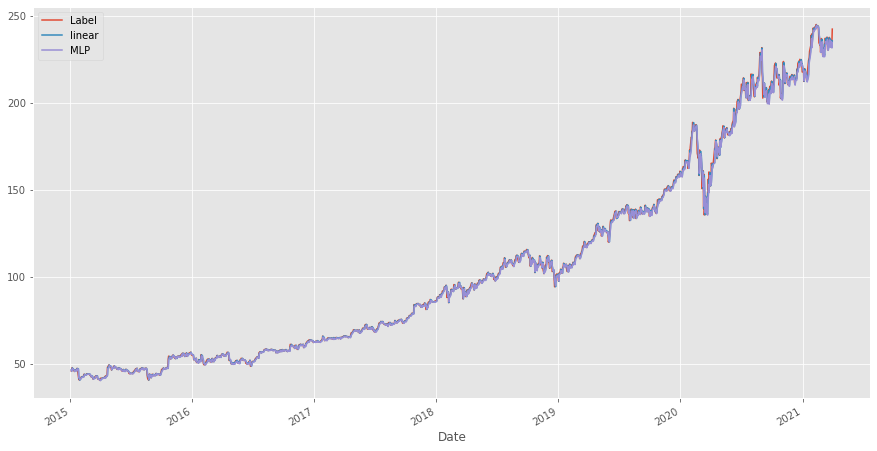

In [304]:
plt.figure(figsize = (15,8), dpi = 80)
df_pred.plot()
plt.show()

<AxesSubplot:xlabel='Date'>

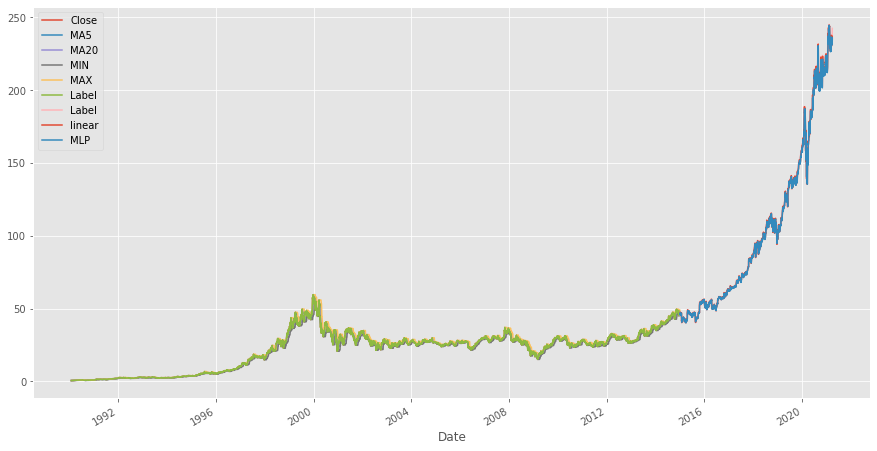

In [305]:
#Combine all data
old_df = pd.concat([X_train, y_train], axis=1)
old_df.tail(10)

combined_old_and_new = pd.concat([old_df, df_pred], axis=1)
combined_old_and_new.tail(10)

combined_old_and_new.plot()

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


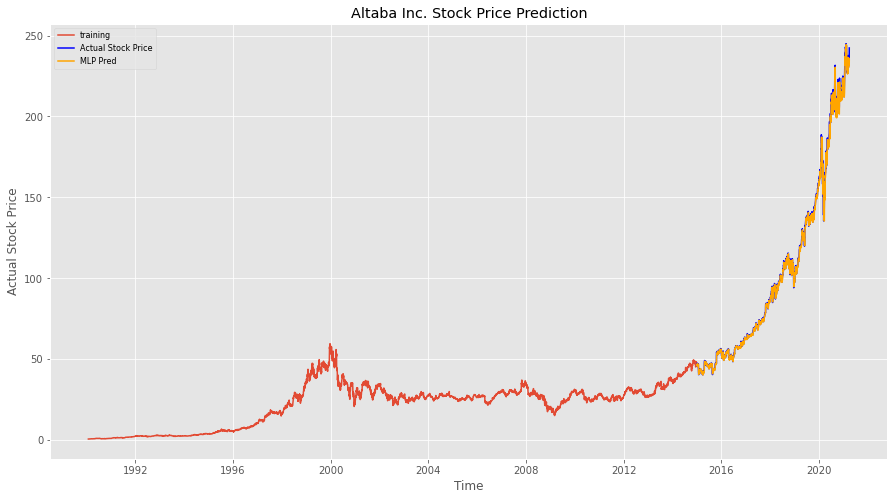

In [306]:
print(type(MLPpredictions))
print(type(y_train))
print(type(y_test))


plt.plot(y_train, label='training')
plt.plot(y_test, color = 'blue', label='Actual Stock Price')
plt.plot(df_pred['MLP'], color = 'orange',label='MLP Pred')
plt.title('Altaba Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## ARIMA MODEL

               Close
Date                
1990-01-02  0.616319
1990-01-03  0.619792
1990-01-04  0.638021
1990-01-05  0.622396
1990-01-06  0.625579


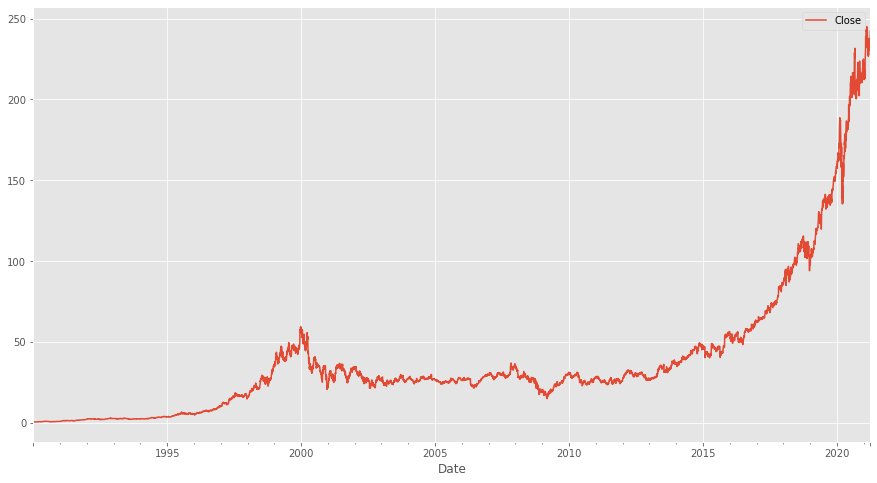

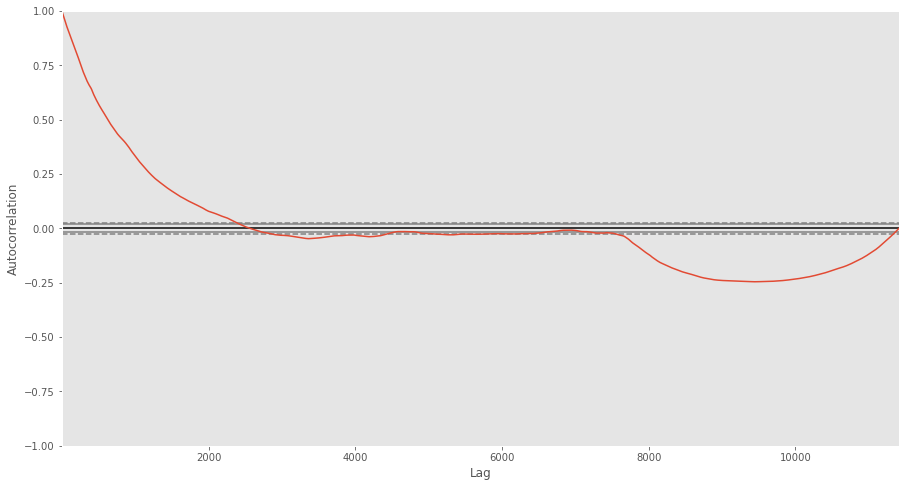

KeyboardInterrupt: 

In [280]:
from pandas.plotting import autocorrelation_plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

start2 = datetime(1990,1,1)
end2 = datetime(2021,4,4)
arima_df = get_data_from_api("MSFT", start2, end2)
arima_df = arima_df.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)

#Set index as datetime
arima_df.index = pd.to_datetime(arima_df.index)
#Resample with day to day basis
arima_df = arima_df.resample('D').mean()
#Fill in missing days
arima_df["Close"] = arima_df["Close"].interpolate(method='linear', axis=0).ffill().bfill()
#Set frequency to daily
arima_df.index.freq = 'D'

arima_df.head(10)
print(arima_df.head())
arima_df.plot()
plt.show()

autocorrelation_plot(arima_df)
plt.show()

train_data, test_data = arima_df[0:int(len(arima_df)*0.8)], arima_df[int(len(arima_df)*0.8):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

In [ ]:
test_set_range = arima_df[int(len(arima_df)*0.8):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('MS Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()
